In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
airports = pd.read_csv("data/Airports Data.csv")
bag_level = pd.read_csv("data/Bag+Level+Data.csv")
flight_level = pd.read_csv("data/Flight Level Data.csv")
pnr_remark_level = pd.read_csv("data/PNR Remark Level Data.csv")
pnr_flight_level = pd.read_csv("data/PNR+Flight+Level+Data.csv")


In [10]:
airports.shape

(5612, 2)

In [10]:
bag_level.sample(10)

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,bag_tag_unique_number,bag_tag_issue_date,bag_type
686912,OO,5601,2025-08-15,ORD,FNT,BAGTAG_501888,2025-08-15,Origin
454780,UA,907,2025-08-05,ORD,FRA,BAGTAG_195459,2025-08-05,Transfer
197485,LX,9,2025-08-09,ORD,ZRH,BAGTAG_466924,2025-08-09,Transfer
490460,UA,1270,2025-08-07,ORD,PUJ,BAGTAG_36702,2025-08-07,Origin
510558,UA,764,2025-08-08,ORD,YYC,BAGTAG_208950,2025-08-08,Origin
80895,UA,359,2025-08-04,ORD,MEX,BAGTAG_522024,2025-08-04,Origin
401720,UA,1657,2025-08-03,ORD,LGA,BAGTAG_599121,2025-08-03,Origin
274282,UA,786,2025-08-13,ORD,BTV,BAGTAG_67452,2025-08-13,Hot Transfer
286138,UA,2177,2025-08-15,ORD,MSN,BAGTAG_70329,2025-08-13,Transfer
536198,G7,4552,2025-08-10,ORD,DAY,BAGTAG_47839,2025-08-09,Transfer


In [4]:
# Drop flights with invalid ground times
invalid = (flight_level['scheduled_ground_time_minutes'] < 0).sum()
print(f"Dropping {invalid} flights with negative ground times")

flight_level = flight_level[flight_level['scheduled_ground_time_minutes'] >= 0].copy()

Dropping 305 flights with negative ground times


In [67]:
flight_level.sample(10)

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,scheduled_departure_datetime_local,scheduled_arrival_datetime_local,actual_departure_datetime_local,actual_arrival_datetime_local,total_seats,fleet_type,carrier,scheduled_ground_time_minutes,actual_ground_time_minutes,minimum_turn_minutes,ground_time_ratio
4054,G7,4481,2025-08-07,ORD,GRR,2025-08-07T07:00:00Z,2025-08-07T09:07:00Z,2025-08-07T06:54:00Z,2025-08-07T08:51:00Z,50,CRJ-550,Express,897,915,29,30.931034
3876,UA,276,2025-08-10,ORD,IAD,2025-08-10T21:31:00Z,2025-08-11T00:30:00Z,2025-08-10T22:14:00Z,2025-08-11T01:06:00Z,200,A321-2NX,Mainline,72,103,62,1.161290
7995,UA,2090,2025-08-08,ORD,MIA,2025-08-08T07:01:00Z,2025-08-08T11:14:00Z,2025-08-08T06:54:00Z,2025-08-08T11:09:00Z,179,B737-900,Mainline,469,479,56,8.375000
2910,UA,1658,2025-08-01,ORD,EWR,2025-08-01T06:00:00Z,2025-08-01T09:13:00Z,2025-08-01T05:56:00Z,2025-08-01T08:50:00Z,179,B737-900,Mainline,379,291,56,6.767857
7211,G7,4194,2025-08-11,ORD,DAY,2025-08-11T14:30:00Z,2025-08-11T16:58:00Z,2025-08-11T14:22:00Z,2025-08-11T16:59:00Z,50,CRJ-550,Express,145,52,29,5.000000
3241,OO,5874,2025-08-10,ORD,PIA,2025-08-10T15:35:00Z,2025-08-10T16:43:00Z,2025-08-10T15:44:00Z,2025-08-10T17:02:00Z,50,CRJ-200,Express,66,67,29,2.275862
7485,UA,2430,2025-08-07,ORD,BNA,2025-08-07T14:10:00Z,2025-08-07T15:55:00Z,2025-08-07T14:09:00Z,2025-08-07T15:34:00Z,166,B737-MAX8,Mainline,76,100,51,1.490196
6509,G7,4558,2025-08-08,ORD,XNA,2025-08-08T08:42:00Z,2025-08-08T10:43:00Z,2025-08-08T08:31:00Z,2025-08-08T10:02:00Z,50,CRJ-550,Express,58,70,29,2.000000
748,UA,476,2025-08-01,ORD,CVG,2025-08-01T10:53:00Z,2025-08-01T13:14:00Z,2025-08-01T10:53:00Z,2025-08-01T13:27:00Z,126,A319-100,Mainline,64,64,43,1.488372
3164,OO,5859,2025-08-01,ORD,BZN,2025-08-01T07:15:00Z,2025-08-01T09:53:00Z,2025-08-01T07:08:00Z,2025-08-01T09:51:00Z,76,ERJ-175,Express,740,738,34,21.764706


In [57]:
pnr_remark_level

,record_locator,pnr_creation_date,flight_number,special_service_request
0,PNR_153489,2025-07-04,308,Airport Wheelchair
1,PNR_153489,2025-07-04,2182,Airport Wheelchair
2,PNR_153508,2025-07-10,2649,Airport Wheelchair
3,PNR_153508,2025-07-10,2100,Airport Wheelchair
4,PNR_153521,2025-03-01,970,Unaccompanied Minor
...,...,...,...,...
51693,PNR_610754,2025-03-16,9,Airport Wheelchair
51694,PNR_610754,2025-03-16,12,Airport Wheelchair
51695,PNR_610754,2025-03-16,4784,Airport Wheelchair
51696,PNR_610754,2025-03-16,5382,Airport Wheelchair


In [ ]:
pnr_flight_level.sample(10)

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,record_locator,pnr_creation_date,total_pax,is_child,basic_economy_ind,is_stroller_user,lap_child_count
0,UA,2494,2025-08-04,ORD,MCI,PNR_520583,2025-07-07,1,N,0,N,0
1,UA,2483,2025-08-06,ORD,IAH,PNR_296107,2025-03-28,1,N,0,N,0
2,UA,1620,2025-08-01,ORD,SEA,PNR_296108,2025-06-30,4,Y,0,N,0
3,UA,1620,2025-08-01,ORD,SEA,PNR_296108,2025-06-30,4,N,0,N,1
4,UA,1620,2025-08-01,ORD,SEA,PNR_296108,2025-06-30,4,Y,0,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...
687873,UA,291,2025-08-03,ORD,BDL,PNR_271652,2025-07-17,1,N,0,N,0
687874,UA,1139,2025-08-07,ORD,DSM,PNR_363174,2025-07-06,2,Y,0,Y,0
687875,UA,1139,2025-08-07,ORD,DSM,PNR_363174,2025-07-06,2,Y,0,N,0
687876,UA,1139,2025-08-07,ORD,DSM,PNR_363174,2025-07-06,2,N,0,N,0


In [83]:
# Convert datetime columns
flight_level['scheduled_departure_datetime_local'] = pd.to_datetime(
    flight_level['scheduled_departure_datetime_local']
)
flight_level['actual_departure_datetime_local'] = pd.to_datetime(
    flight_level['actual_departure_datetime_local']
)
flight_level['scheduled_arrival_datetime_local'] = pd.to_datetime(
    flight_level['scheduled_arrival_datetime_local']
)
flight_level['scheduled_departure_date_local'] = pd.to_datetime(
    flight_level['scheduled_departure_date_local']
)


In [84]:
# Calculate delay in minutes
flight_level['delay_minutes'] = (
    flight_level['actual_departure_datetime_local'] - 
    flight_level['scheduled_departure_datetime_local']
).dt.total_seconds() / 60

EDA Question 1: Delay Analysis

In [85]:
avg_delay = flight_level['delay_minutes'].mean()
delayed_flights = (flight_level['delay_minutes'] > 0).sum()
pct_delayed = (delayed_flights / len(flight_level)) * 100

print(f"Average delay: {avg_delay:.2f} minutes")
print(f"Flights delayed: {delayed_flights:,} out of {len(flight_level):,}")
print(f"Percentage delayed: {pct_delayed:.2f}%")

Average delay: 17.15 minutes
Flights delayed: 3,717 out of 7,794
Percentage delayed: 47.69%


/tmp/ipykernel_76742/1901252941.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=flight_level, x='status', palette=['green', 'red'], ax=axes[0, 1])


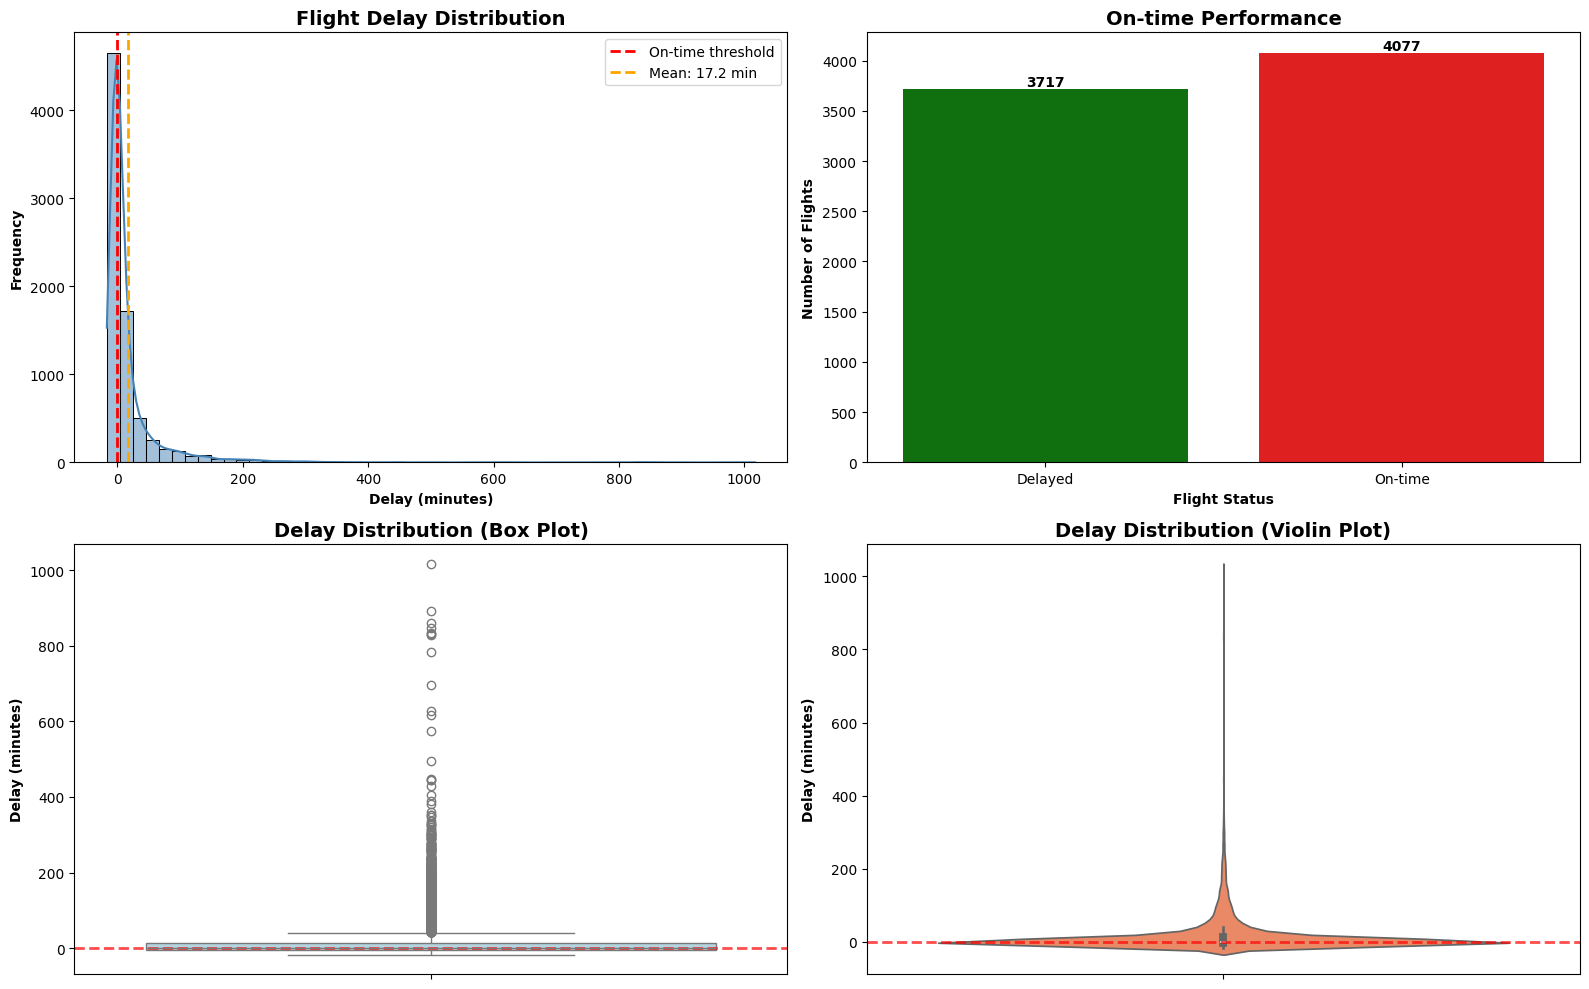

In [86]:
# Visualization: Delay Distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Distribution plot with KDE
sns.histplot(data=flight_level, x='delay_minutes', bins=50, kde=True, 
             color='steelblue', ax=axes[0, 0])
axes[0, 0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='On-time threshold')
axes[0, 0].axvline(x=avg_delay, color='orange', linestyle='--', linewidth=2, 
                   label=f'Mean: {avg_delay:.1f} min')
axes[0, 0].set_xlabel('Delay (minutes)', fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontweight='bold')
axes[0, 0].set_title('Flight Delay Distribution', fontsize=14, fontweight='bold')
axes[0, 0].legend()

# 2. Count plot for on-time vs delayed
flight_level['status'] = flight_level['delay_minutes'].apply(
    lambda x: 'On-time' if x <= 0 else 'Delayed'
)
sns.countplot(data=flight_level, x='status', palette=['green', 'red'], ax=axes[0, 1])
axes[0, 1].set_xlabel('Flight Status', fontweight='bold')
axes[0, 1].set_ylabel('Number of Flights', fontweight='bold')
axes[0, 1].set_title('On-time Performance', fontsize=14, fontweight='bold')
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, fmt='%d', fontweight='bold')

# 3. Box plot for delay distribution
sns.boxplot(data=flight_level, y='delay_minutes', color='lightblue', ax=axes[1, 0])
axes[1, 0].axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.7)
axes[1, 0].set_ylabel('Delay (minutes)', fontweight='bold')
axes[1, 0].set_title('Delay Distribution (Box Plot)', fontsize=14, fontweight='bold')

# 4. Violin plot for more detailed distribution
sns.violinplot(data=flight_level, y='delay_minutes', color='coral', ax=axes[1, 1])
axes[1, 1].axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.7)
axes[1, 1].set_ylabel('Delay (minutes)', fontweight='bold')
axes[1, 1].set_title('Delay Distribution (Violin Plot)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


EDA Question 2: Ground Time Analysis

Average ground time ratio: 4.18x minimum
Flights with tight turnaround (≤1.1x min): 475 (6.09%)


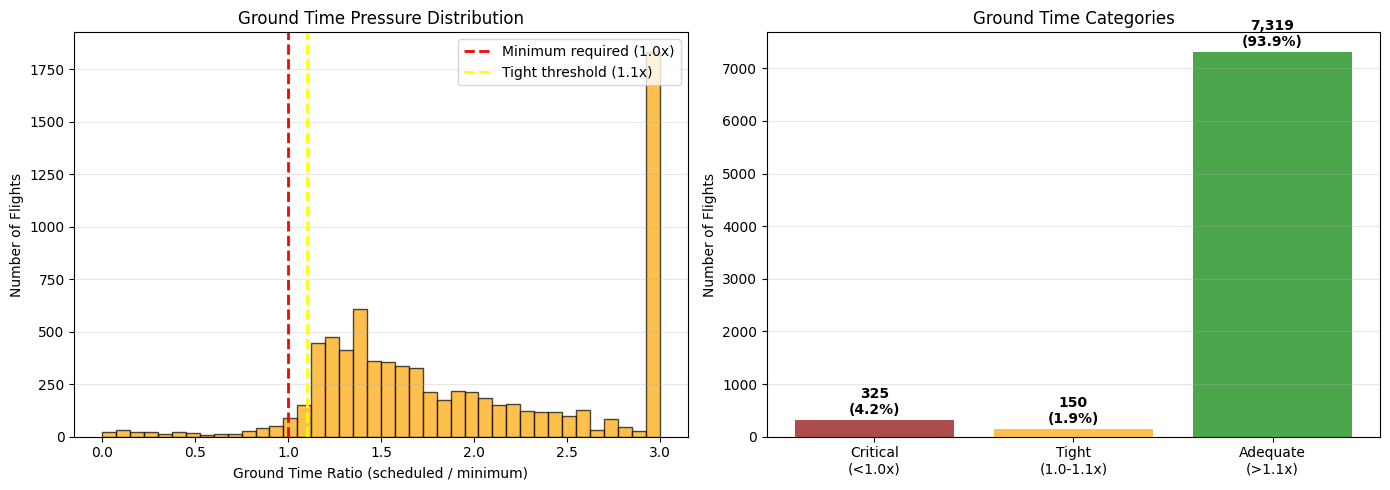

In [71]:
# Calculate ground time ratio
flight_level['ground_time_ratio'] = (
    flight_level['scheduled_ground_time_minutes'] / 
    flight_level['minimum_turn_minutes']
)

tight_turnaround = (flight_level['ground_time_ratio'] <= 1.1).sum()
pct_tight = (tight_turnaround / len(flight_level)) * 100

print(f"Average ground time ratio: {flight_level['ground_time_ratio'].mean():.2f}x minimum")
print(f"Flights with tight turnaround (≤1.1x min): {tight_turnaround:,} ({pct_tight:.2f}%)")

# Visualization: Ground Time Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Ground time ratio distribution
axes[0].hist(flight_level['ground_time_ratio'].clip(upper=3), bins=40, 
            edgecolor='black', alpha=0.7, color='orange')
axes[0].axvline(x=1.0, color='red', linestyle='--', linewidth=2, 
               label='Minimum required (1.0x)')
axes[0].axvline(x=1.1, color='yellow', linestyle='--', linewidth=2, 
               label='Tight threshold (1.1x)')
axes[0].set_xlabel('Ground Time Ratio (scheduled / minimum)')
axes[0].set_ylabel('Number of Flights')
axes[0].set_title('Ground Time Pressure Distribution')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Tight vs Adequate turnaround
turnaround_categories = ['Critical\n(<1.0x)', 'Tight\n(1.0-1.1x)', 'Adequate\n(>1.1x)']
turnaround_counts = [
    (flight_level['ground_time_ratio'] < 1.0).sum(),
    ((flight_level['ground_time_ratio'] >= 1.0) & 
     (flight_level['ground_time_ratio'] <= 1.1)).sum(),
    (flight_level['ground_time_ratio'] > 1.1).sum()
]
colors = ['darkred', 'orange', 'green']
axes[1].bar(turnaround_categories, turnaround_counts, color=colors, alpha=0.7)
axes[1].set_ylabel('Number of Flights')
axes[1].set_title('Ground Time Categories')
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(turnaround_counts):
    axes[1].text(i, v + 50, f'{v:,}\n({v/len(flight_level)*100:.1f}%)', 
                ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

EDA Question 3: Baggage Analysis

In [16]:
# Aggregate bag data by flight
bag_summary = bag_level.groupby(
    ['company_id', 'flight_number', 'scheduled_departure_date_local', 
     'scheduled_departure_station_code', 'scheduled_arrival_station_code']
).agg(
    total_bags=('bag_tag_unique_number', 'count'),
    transfer_bags=('bag_type', lambda x: x.isin(['Transfer', 'Hot Transfer']).sum())
).reset_index()

bag_summary['checked_bags'] = bag_summary['total_bags'] - bag_summary['transfer_bags']
bag_summary['transfer_ratio'] = bag_summary['transfer_bags'] / bag_summary['total_bags']

print(f"Average bags per flight: {bag_summary['total_bags'].mean():.1f}")
print(f"Average transfer ratio: {bag_summary['transfer_ratio'].mean():.2%}")


Average bags per flight: 63.3
Average transfer ratio: 68.15%


/tmp/ipykernel_76742/1995349440.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=bag_summary_long, x='Bag Type', y='Count',
/tmp/ipykernel_76742/1995349440.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bag_summary, x='transfer_category', palette=palette_transfer, ax=axes[1, 1])


✓ Saved: baggage_analysis.png


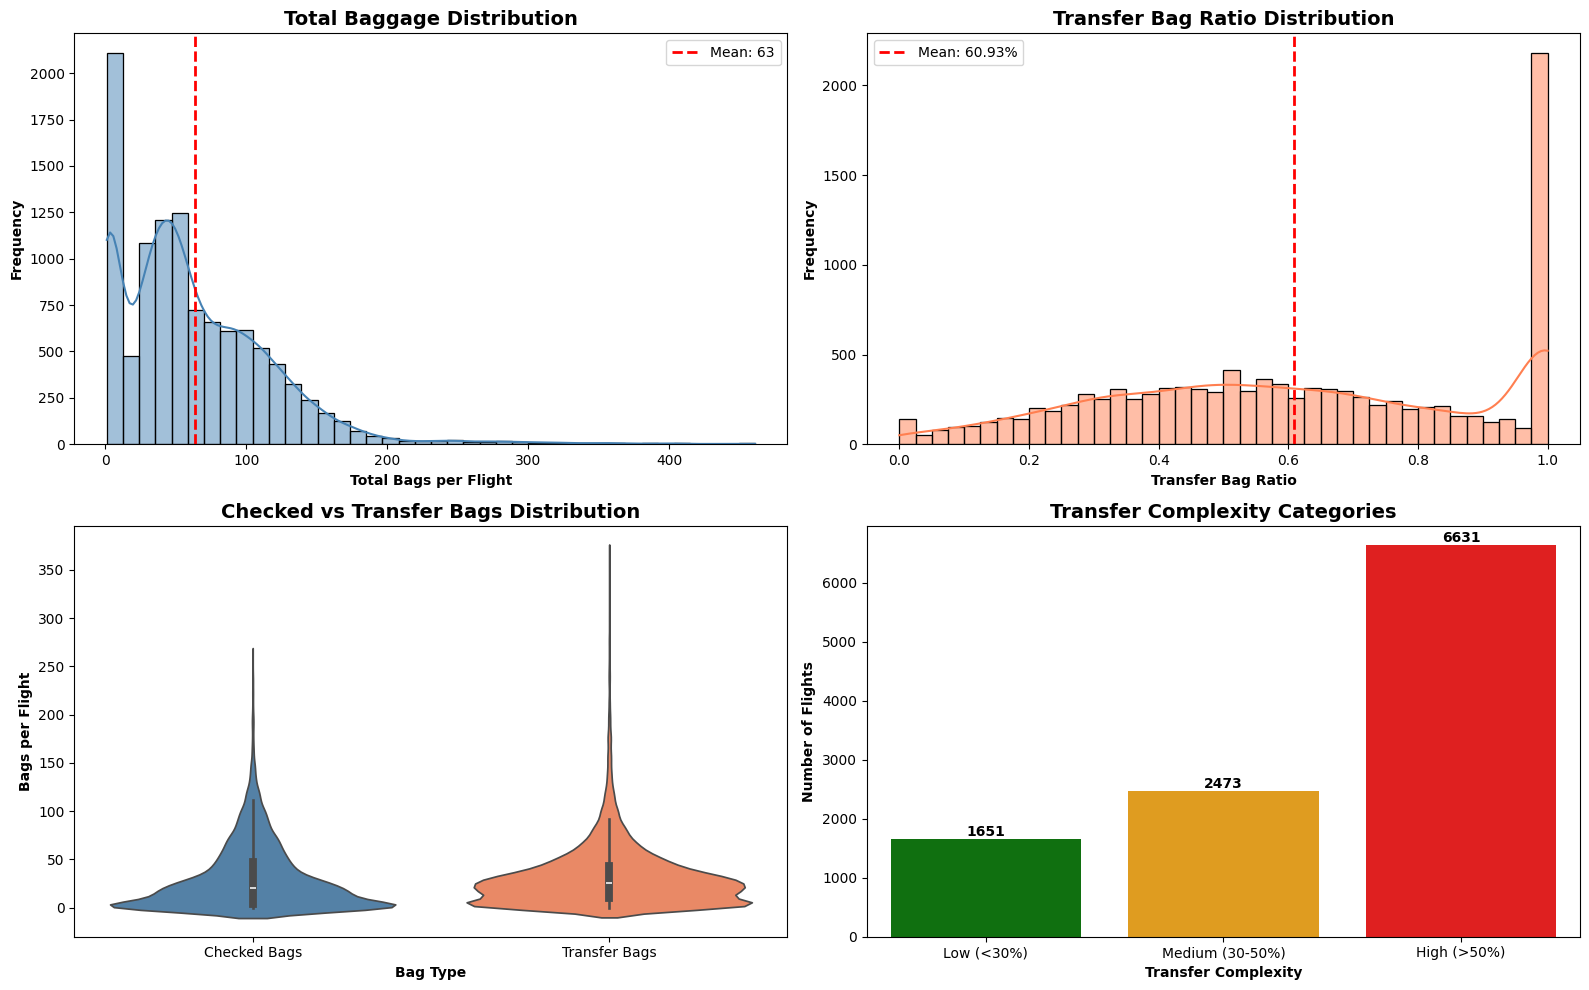

In [ ]:
# Create long format for bag types
bag_summary_long = bag_summary[['checked_bags', 'transfer_bags']].melt(
    var_name='Bag Type', value_name='Count'
)
bag_summary_long['Bag Type'] = bag_summary_long['Bag Type'].str.replace('_', ' ').str.title()

# Visualization: Baggage Analysis with Seaborn
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Total bags distribution
sns.histplot(data=bag_summary, x='total_bags', bins=40, kde=True, 
             color='steelblue', ax=axes[0, 0])
axes[0, 0].axvline(x=bag_summary['total_bags'].mean(), color='red', 
                   linestyle='--', linewidth=2, label=f'Mean: {bag_summary["total_bags"].mean():.0f}')
axes[0, 0].set_xlabel('Total Bags per Flight', fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontweight='bold')
axes[0, 0].set_title('Total Baggage Distribution', fontsize=14, fontweight='bold')
axes[0, 0].legend()

# 2. Transfer ratio distribution
sns.histplot(data=bag_summary, x='transfer_ratio', bins=40, kde=True, 
             color='coral', ax=axes[0, 1])
axes[0, 1].axvline(x=bag_summary['transfer_ratio'].mean(), color='red', 
                   linestyle='--', linewidth=2, label=f'Mean: {bag_summary["transfer_ratio"].mean():.2%}')
axes[0, 1].set_xlabel('Transfer Bag Ratio', fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontweight='bold')
axes[0, 1].set_title('Transfer Bag Ratio Distribution', fontsize=14, fontweight='bold')
axes[0, 1].legend()

# 3. Violin plot comparing checked vs transfer
sns.violinplot(data=bag_summary_long, x='Bag Type', y='Count', 
               palette=['steelblue', 'coral'], ax=axes[1, 0])
axes[1, 0].set_xlabel('Bag Type', fontweight='bold')
axes[1, 0].set_ylabel('Bags per Flight', fontweight='bold')
axes[1, 0].set_title('Checked vs Transfer Bags Distribution', fontsize=14, fontweight='bold')

# 4. Transfer complexity categories
bag_summary['transfer_category'] = pd.cut(
    bag_summary['transfer_ratio'],
    bins=[0, 0.3, 0.5, 1.0],
    labels=['Low (<30%)', 'Medium (30-50%)', 'High (>50%)']
)
palette_transfer = ['green', 'orange', 'red']
sns.countplot(data=bag_summary, x='transfer_category', palette=palette_transfer, ax=axes[1, 1])
axes[1, 1].set_xlabel('Transfer Complexity', fontweight='bold')
axes[1, 1].set_ylabel('Number of Flights', fontweight='bold')
axes[1, 1].set_title('Transfer Complexity Categories', fontsize=14, fontweight='bold')
for container in axes[1, 1].containers:
    axes[1, 1].bar_label(container, fmt='%d', fontweight='bold')

plt.tight_layout()
plt.show()

EDA Question 4: Passenger Load Analysis

In [6]:
unique_pnrs = pnr_flight_level.drop_duplicates(subset=['company_id', 'flight_number', 'scheduled_departure_date_local', 'record_locator'])
passenger_load = unique_pnrs.groupby(['company_id', 'flight_number', 'scheduled_departure_date_local'])['total_pax'].sum().reset_index()
passenger_load = passenger_load.rename(columns={'total_pax': 'total_passengers'})

In [7]:
passenger_load.sample(5)

,company_id,flight_number,scheduled_departure_date_local,total_passengers
5164,UA,1584,2025-08-14,200
6495,UA,2200,2025-08-12,77
3148,UA,291,2025-08-15,149
5194,UA,1599,2025-08-15,361
4110,UA,953,2025-08-04,198


In [98]:
passenger_load['total_passengers'].describe()

count    8071.000000
mean      109.466237
std        62.365277
min         1.000000
25%        50.000000
50%       106.000000
75%       161.000000
max       364.000000
Name: total_passengers, dtype: float64

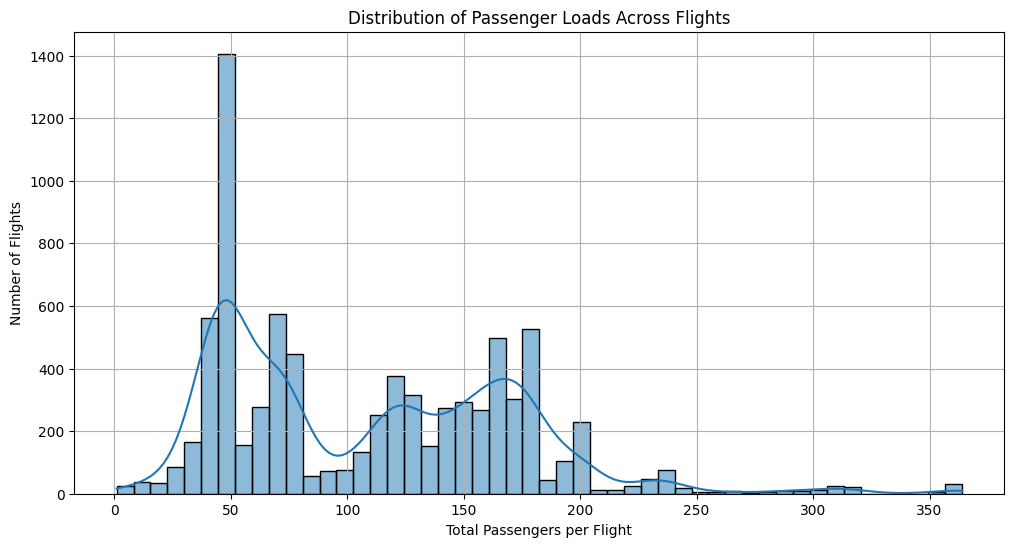

In [99]:
plt.figure(figsize=(12, 6))
sns.histplot(passenger_load['total_passengers'], bins=50, kde=True)
plt.title('Distribution of Passenger Loads Across Flights')
plt.xlabel('Total Passengers per Flight')
plt.ylabel('Number of Flights')
plt.grid(True)
plt.show()


Correlation between Load Factor and Departure Delay (for delayed flights): -0.25


/tmp/ipykernel_76742/3076373180.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


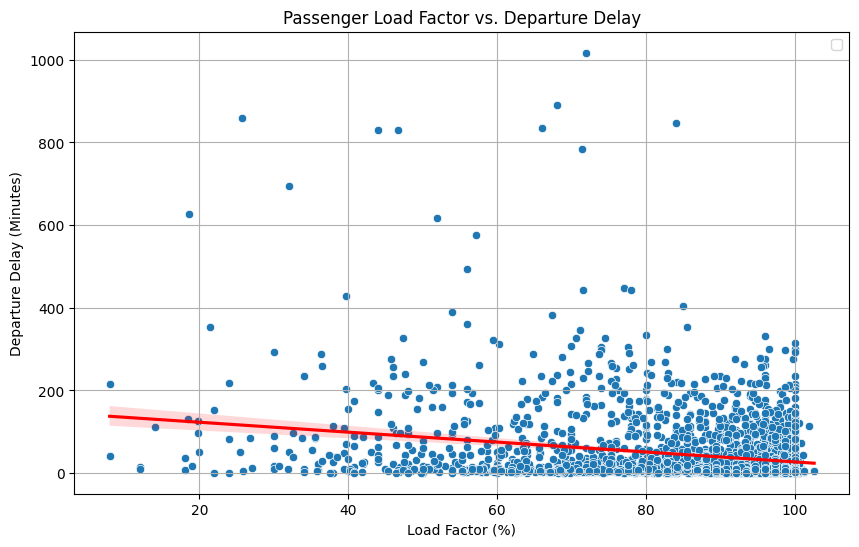

In [100]:
flight_data = pd.merge(passenger_load, flight_level, on=['company_id', 'flight_number', 'scheduled_departure_date_local'])

# *Step 3: Calculate Load Factor (%)*
flight_data['load_factor'] = (flight_data['total_passengers'] / flight_data['total_seats']) * 100

# *Step 4: Calculate Departure Delay in Minutes*
# This is our key metric for "operational difficulty"
flight_data['departure_delay_minutes'] = (flight_data['actual_departure_datetime_local'] - flight_data['scheduled_departure_datetime_local']).dt.total_seconds() / 60

# *Step 5: Analyze the correlation*
# We only consider actual delays (delay > 0) for this analysis
delayed_flights = flight_data[flight_data['departure_delay_minutes'] > 0]
correlation = delayed_flights['load_factor'].corr(delayed_flights['departure_delay_minutes'])
print(f"\nCorrelation between Load Factor and Departure Delay (for delayed flights): {correlation:.2f}")

# *Step 6: Visualize the relationship*
plt.figure(figsize=(10, 6))
sns.scatterplot(x='load_factor', y='departure_delay_minutes', data=delayed_flights)
sns.regplot(x='load_factor', y='departure_delay_minutes', data=delayed_flights, scatter=False, color='red', line_kws={'label': f'Correlation: {correlation:.2f}'})
plt.title('Passenger Load Factor vs. Departure Delay')
plt.xlabel('Load Factor (%)')
plt.ylabel('Departure Delay (Minutes)')
plt.legend()
plt.grid(True)
plt.show()

EDA Question 5: Special Service Requests


5. SPECIAL SERVICE REQUEST (SSR) ANALYSIS
----------------------------------------
Total SSR records: 51,698
Flights with SSR: 4,678
Average SSR per flight (with requests): 11.1

Controlling for high load (>85%):
  High SSR + High Load avg delay: 17.0 min
  Low SSR + High Load avg delay: 4.2 min


/tmp/ipykernel_76742/3832916079.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  flight_with_ssr['ssr_count'].fillna(0, inplace=True)
/tmp/ipykernel_76742/3832916079.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ssr_df, y='SSR Type', x='Count', palette='viridis', ax=axes[0, 1])
/tmp/ipykernel_76742/3832916079.py:56: FutureWarning: 

Passing `palette` without assi

✓ Saved: ssr_analysis.png


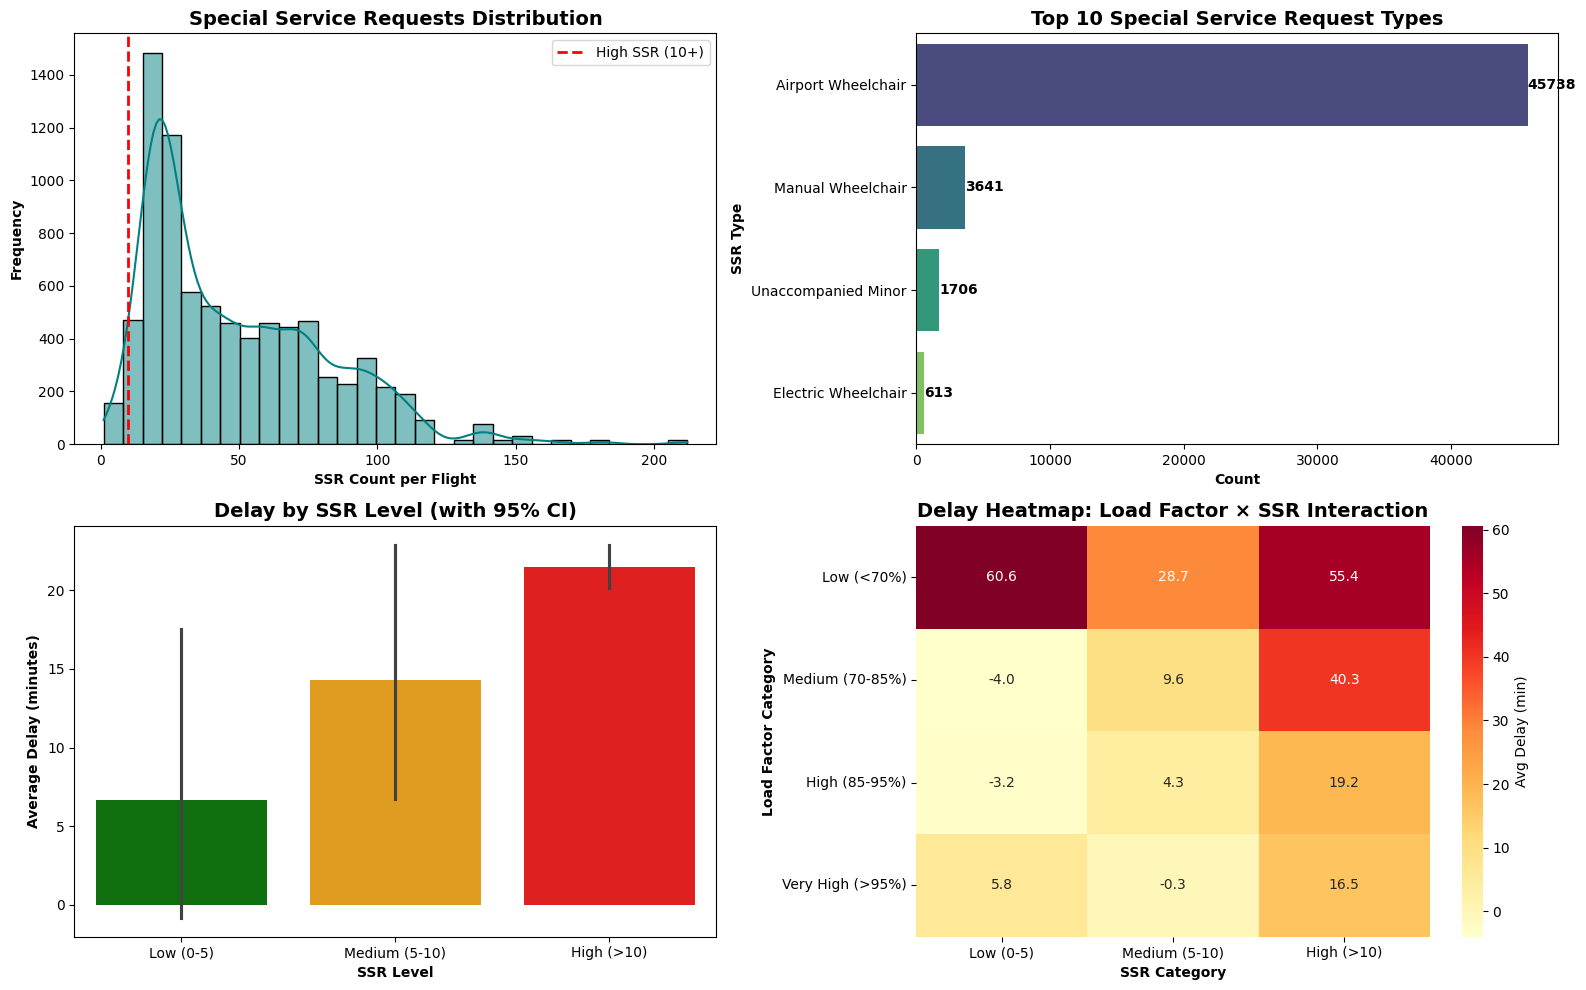


EDA COMPLETE - All visualizations saved!

Generated files:
  1. delay_analysis.png
  2. ground_time_analysis.png
  3. baggage_analysis.png
  4. passenger_load_analysis.png
  5. ssr_analysis.png


In [ ]:
# Count SSR by flight
ssr_by_flight = pnr_remark_level.groupby('flight_number').size().reset_index(name='ssr_count')

print(f"Total SSR records: {len(pnr_remark_level):,}")
print(f"Flights with SSR: {len(ssr_by_flight):,}")
print(f"Average SSR per flight (with requests): {ssr_by_flight['ssr_count'].mean():.1f}")

# Top SSR types
ssr_types = pnr_remark_level['special_service_request'].value_counts().head(10)

# Merge SSR with flight data
flight_with_ssr = flight_with_pax.merge(ssr_by_flight, on='flight_number', how='left')
flight_with_ssr['ssr_count'].fillna(0, inplace=True)

# Create SSR categories
flight_with_ssr['ssr_category'] = pd.cut(
    flight_with_ssr['ssr_count'],
    bins=[-0.1, 5, 10, float('inf')],
    labels=['Low (0-5)', 'Medium (5-10)', 'High (>10)']
)

# Control for load factor analysis
high_load = flight_with_ssr['load_factor'] > 0.85
high_ssr = flight_with_ssr['ssr_count'] >= 10

print(f"\nControlling for high load (>85%):")
print(f"  High SSR + High Load avg delay: {flight_with_ssr[high_load & high_ssr]['delay_minutes'].mean():.1f} min")
print(f"  Low SSR + High Load avg delay: {flight_with_ssr[high_load & ~high_ssr]['delay_minutes'].mean():.1f} min")

# Visualization: SSR Analysis with Seaborn
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. SSR distribution
sns.histplot(data=flight_with_ssr, x='ssr_count', bins=30, kde=True, 
             color='teal', ax=axes[0, 0])
axes[0, 0].axvline(x=10, color='red', linestyle='--', linewidth=2, label='High SSR (10+)')
axes[0, 0].set_xlabel('SSR Count per Flight', fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontweight='bold')
axes[0, 0].set_title('Special Service Requests Distribution', fontsize=14, fontweight='bold')
axes[0, 0].legend()

# 2. Top SSR types
ssr_df = pd.DataFrame({'SSR Type': ssr_types.index, 'Count': ssr_types.values})
sns.barplot(data=ssr_df, y='SSR Type', x='Count', palette='viridis', ax=axes[0, 1])
axes[0, 1].set_xlabel('Count', fontweight='bold')
axes[0, 1].set_ylabel('SSR Type', fontweight='bold')
axes[0, 1].set_title('Top 10 Special Service Request Types', fontsize=14, fontweight='bold')
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, fmt='%d', fontweight='bold')

# 3. Delay by SSR category
palette_ssr = ['green', 'orange', 'red']
sns.barplot(data=flight_with_ssr, x='ssr_category', y='delay_minutes', 
            palette=palette_ssr, estimator=np.mean, errorbar=('ci', 95), ax=axes[1, 0])
axes[1, 0].set_xlabel('SSR Level', fontweight='bold')
axes[1, 0].set_ylabel('Average Delay (minutes)', fontweight='bold')
axes[1, 0].set_title('Delay by SSR Level (with 95% CI)', fontsize=14, fontweight='bold')

# 4. Heatmap: SSR + Load interaction
# Create interaction matrix
interaction_data = flight_with_ssr.groupby(['load_category', 'ssr_category'])['delay_minutes'].mean().unstack()
sns.heatmap(interaction_data, annot=True, fmt='.1f', cmap='YlOrRd', 
            cbar_kws={'label': 'Avg Delay (min)'}, ax=axes[1, 1])
axes[1, 1].set_xlabel('SSR Category', fontweight='bold')
axes[1, 1].set_ylabel('Load Factor Category', fontweight='bold')
axes[1, 1].set_title('Delay Heatmap: Load Factor × SSR Interaction', 
                     fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('ssr_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: ssr_analysis.png")
plt.show()

print("\n" + "="*80)
print("EDA COMPLETE - All visualizations saved!")
print("="*80)
print("\nGenerated files:")
print("  1. delay_analysis.png")
print("  2. ground_time_analysis.png")
print("  3. baggage_analysis.png")
print("  4. passenger_load_analysis.png")
print("  5. ssr_analysis.png")


Correlation between Load Factor and Departure Delay (for delayed flights): -0.27


/tmp/ipykernel_76742/1117567726.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


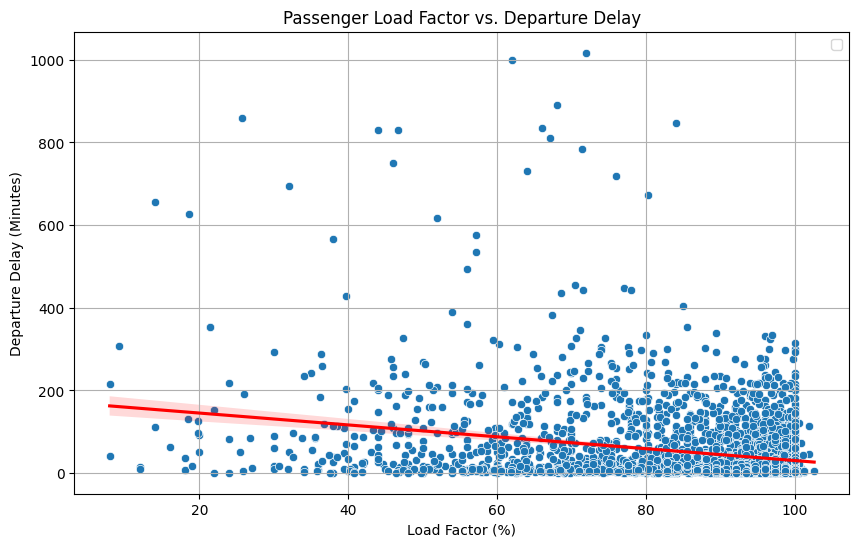

In [42]:
# Calculate total passengers for each flight by summing 'total_pax' from unique PNRs
unique_pnrs = pnr_flight_level.drop_duplicates(subset=['company_id', 'flight_number', 'scheduled_departure_date_local', 'record_locator'])
passenger_load = unique_pnrs.groupby(['company_id', 'flight_number', 'scheduled_departure_date_local'])['total_pax'].sum().reset_index()
passenger_load = passenger_load.rename(columns={'total_pax': 'total_passengers'})


# --- Part 2: Calculate Delay and Analyze Correlation ---

# This section requires 'flight_level_data.csv' which contains operational details.

# *Step 1: Convert time columns to datetime objects for calculation*
flight_level['scheduled_departure_datetime_local'] = pd.to_datetime(flight_level['scheduled_departure_datetime_local'])
flight_level['actual_departure_datetime_local'] = pd.to_datetime(flight_level['actual_departure_datetime_local'])

# *Step 2: Merge the passenger and flight datasets*
flight_data = pd.merge(passenger_load, flight_level, on=['company_id', 'flight_number', 'scheduled_departure_date_local'])

# *Step 3: Calculate Load Factor (%)*
flight_data['load_factor'] = (flight_data['total_passengers'] / flight_data['total_seats']) * 100

# *Step 4: Calculate Departure Delay in Minutes*
# This is our key metric for "operational difficulty"
flight_data['departure_delay_minutes'] = (flight_data['actual_departure_datetime_local'] - flight_data['scheduled_departure_datetime_local']).dt.total_seconds() / 60

# *Step 5: Analyze the correlation*
# We only consider actual delays (delay > 0) for this analysis
delayed_flights = flight_data[flight_data['departure_delay_minutes'] > 0]
correlation = delayed_flights['load_factor'].corr(delayed_flights['departure_delay_minutes'])
print(f"\nCorrelation between Load Factor and Departure Delay (for delayed flights): {correlation:.2f}")

# *Step 6: Visualize the relationship*
plt.figure(figsize=(10, 6))
sns.scatterplot(x='load_factor', y='departure_delay_minutes', data=delayed_flights)
sns.regplot(x='load_factor', y='departure_delay_minutes', data=delayed_flights, scatter=False, color='red', line_kws={'label': f'Correlation: {correlation:.2f}'})
plt.title('Passenger Load Factor vs. Departure Delay')
plt.xlabel('Load Factor (%)')
plt.ylabel('Departure Delay (Minutes)')
plt.legend()
plt.grid(True)
plt.show()